In [128]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from tensorflow.python.keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model

Первая часть лабораторной

In [129]:
x = np.arange(10).reshape(-1,1) # reshape(-1,1) сделать из строки столбец
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1]) # numpy массив из листа

In [113]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state= 40)  # разбивка данных на тренировочную и тестовую test_size это процент тестовой выборки из всех элементов, 0.4 - 40%, random_state - отвечает за перемешивание данных при разбивке на трейн и тест, а само число хз на что влияет
t = to_categorical(y) # перевод переменной у в категориальные переменные два столбца это два класса, строки это принадлежность элемента к определенному классу (Преобразует вектор класса (целые числа) в двоичную матрицу класса.)
t

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [114]:
network = models.Sequential() # Создание модели нейронки Sequential() значит последовательная модель в конце будет видно
network.add(layers.Dense(32, activation='relu', name = 'LayerInput')) # add() добавление слоев в модель, 20 Положительное целое число размерность выходного пространства то есть количество нейронов, activation - функция активации, name - необязательное для отображения названия слоя на графике ниже
network.add(layers.Dense(2, activation='softmax', name= 'LayerTwo')) # в последнем слое количество выходных нейронов должно быть равно количеству классов которые у нас есть в данном случае 0 и 1 то есть 2 класса
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])  # optimizer= строка (имя оптимизатора) или экземпляр оптимизатора https://www.tensorflow.org/api_docs/python/tf/keras/optimizers написано какие есть оптимизаторы, loss= функция потери на https://www.tensorflow.org/api_docs/python/tf/keras/losses можно посмотреть какие есть функции. metrics= список метрик (их может быть несколько поэтому [], которые будут оцениваться моделью во время обучения и тестирования на https://www.tensorflow.org/api_docs/python/tf/keras/metrics


In [115]:
network_history = network.fit(x, t, epochs=100, batch_size=5, verbose=1) # Обучение модели х это массив на которых нужно обучить модель, t созданный массив категориальных переменных epochs - данные х и t сто раз прошли через нейронную сеть в прямом и обратном направлении, batch_size - это количество выборок, которые передаются в сеть одновременно, то есть количесво элементов тестовой выборки. verbose= количество отображаемой информации при обучении 1 - много информации 3 - только эпохи,
# network_history переменная нужна чисто для отрисовки графика истории обучения, роста точности и снижения ошибки

Epoch 1/100
2/2 [==============================] - 1s 0s/step - loss: 0.6647 - accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5872 - accuracy: 0.6000
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 0.5520 - accuracy: 0.6000
Epoch 4/100
2/2 [==============================] - 0s 0s/step - loss: 0.5360 - accuracy: 0.6000
Epoch 5/100
2/2 [==============================] - 0s 0s/step - loss: 0.5203 - accuracy: 0.6000
Epoch 6/100
2/2 [==============================] - 0s 0s/step - loss: 0.5066 - accuracy: 0.6000
Epoch 7/100
2/2 [==============================] - 0s 0s/step - loss: 0.4995 - accuracy: 0.6000
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 0.4951 - accuracy: 0.7000
Epoch 9/100
2/2 [==============================] - 0s 0s/step - loss: 0.4855 - accuracy: 0.7000
Epoch 10/100
2/2 [==============================] - 0s 0s/step - loss: 0.4890 - accuracy: 0.7000
Epoch 11/100
2/2 [=================

In [116]:
z = network.predict(x, verbose= 1) # Генерирует предсказания для входного массива х, verbose аналогично fit(), возвращает Numpy массив(ы) предсказаний вероятности, где каждый столбец это класс
print(z)

1/1 [==============================] - 0s 120ms/step
[[0.6502558  0.3497442 ]
 [0.63102394 0.36897603]
 [0.50248533 0.4975147 ]
 [0.36975345 0.6302465 ]
 [0.25417078 0.7458293 ]
 [0.16524541 0.83475465]
 [0.10312988 0.8968701 ]
 [0.06261216 0.9373879 ]
 [0.03735012 0.9626499 ]
 [0.02204086 0.97795916]]


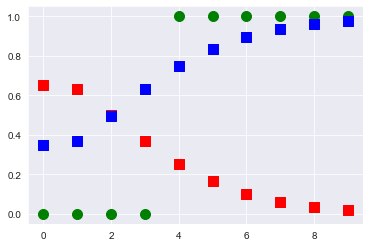

In [117]:
plt.scatter(x, y, color='green', s=100, marker="o") # график исходных данных
plt.scatter(x, z[:, 0], color='red', s=105, marker="s")  # график предсказанных данных для класса 0
plt.scatter(x, z[:, 1], color='blue', s=105, marker="s") # график предсказанных данных для класса 1

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LayerInput (Dense)          (None, 32)                64        
                                                                 
 LayerTwo (Dense)            (None, 2)                 66        
                                                                 
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________
None


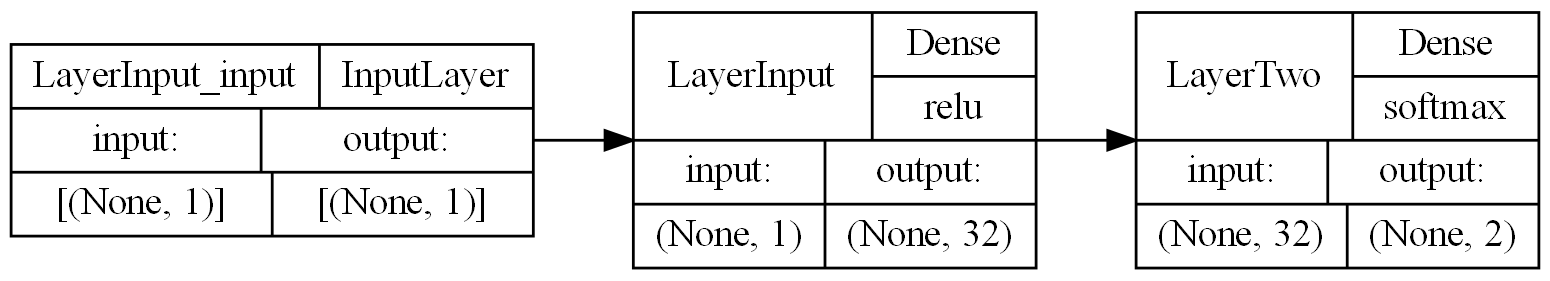

In [118]:
print(network.summary()) # Для плотных слоев: Param # вычисляется output_size * (input_size + 1) == number_parameters - 32*(1+1) + 2*(32+1) = 130
plot_model(network, show_shapes=True, show_layer_names=True, rankdir="LR", dpi=200, show_layer_activations=True) # network модель нейронной сети, show_shapes - отображать ли информацию о форме это ([None,1]), show_layer_names названия слоев которые были введены при создании модели нейронки, rankdir="LR" - рисунок горизонтально, 'TB' - вертикально, dpi разрешение show_layer_activations отображение активаций слоев (только для слоев, у которых есть activation свойство).

# может вывести вот такую ошибку - You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
# помогла вот эта установка в консоли анаконды -  conda install pydot

In [119]:
print(network.layers[0].get_weights()) # вывод весов первого [0] входного слоя сети
print('\n',network.layers[1].get_weights()) # сумма весов двух слоев как раз и равна количеству параметров (Param#) сети выше

[array([[ 0.28975675,  0.3257735 , -0.23509556, -0.24153027,  0.25405186,
         0.3072025 , -0.1456275 , -0.24918246, -0.07506979, -0.19245271,
         0.13460694, -0.00996757,  0.053817  , -0.22577773,  0.31586334,
         0.32455826,  0.30609632,  0.17007542,  0.0622963 , -0.1614148 ,
         0.25962624,  0.4344183 ,  0.29248273, -0.12273544,  0.2786328 ,
        -0.15649903, -0.34113362, -0.17301688,  0.36631268, -0.3550047 ,
        -0.01230722, -0.12902659]], dtype=float32), array([ 0.13271065, -0.12180381,  0.        ,  0.        , -0.11961935,
       -0.11957622,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.11989468,  0.        ,  0.13341767,  0.        ,  0.1326919 ,
       -0.13300797, -0.11978446,  0.1329985 , -0.09582283,  0.        ,
       -0.11963739, -0.12498883,  0.1327195 ,  0.        , -0.12347247,
        0.        ,  0.        ,  0.        , -0.12402058,  0.        ,
        0.14973675,  0.        ], dtype=float32)]

 [array([[-0.00366479, -0.

Вторая часть лабораторной

In [120]:
from sklearn.datasets import load_iris

In [121]:
iris = load_iris(as_frame=True) # as_frame= значит что данные возвратятся в пандас с названиями столбцов, без этого вернется словарь с ключами таргет и дата.
iris.frame.head() # показать первые 5 строк датафрейма

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [122]:
X = iris.data # .data это срез по первым 4 столбцам данных длины и ширины
y = iris.target # .target это срез по столбцу target который является идентификатором класса
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state= 40)
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
4,5.0,3.6,1.4,0.2
143,6.8,3.2,5.9,2.3
61,5.9,3.0,4.2,1.5
10,5.4,3.7,1.5,0.2
112,6.8,3.0,5.5,2.1
...,...,...,...,...
71,6.1,2.8,4.0,1.3
12,4.8,3.0,1.4,0.1
50,7.0,3.2,4.7,1.4
7,5.0,3.4,1.5,0.2


In [123]:
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [124]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(4,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [125]:
model_history = model.fit(X_train, train_labels, epochs=30, batch_size=3, verbose=1)

Epoch 1/30
30/30 [==============================] - 1s 2ms/step - loss: 0.9387 - accuracy: 0.5889 
Epoch 2/30
30/30 [==============================] - 0s 1ms/step - loss: 0.7059 - accuracy: 0.7000
Epoch 3/30
30/30 [==============================] - 0s 1ms/step - loss: 0.5685 - accuracy: 0.7889
Epoch 4/30
30/30 [==============================] - 0s 1ms/step - loss: 0.4807 - accuracy: 0.8333
Epoch 5/30
30/30 [==============================] - 0s 1ms/step - loss: 0.4331 - accuracy: 0.8111
Epoch 6/30
30/30 [==============================] - 0s 2ms/step - loss: 0.3787 - accuracy: 0.8444
Epoch 7/30
30/30 [==============================] - 0s 1ms/step - loss: 0.3577 - accuracy: 0.9333
Epoch 8/30
30/30 [==============================] - 0s 1ms/step - loss: 0.3254 - accuracy: 0.9111
Epoch 9/30
30/30 [==============================] - 0s 1ms/step - loss: 0.3024 - accuracy: 0.9111
Epoch 10/30
30/30 [==============================] - 0s 2ms/step - loss: 0.2658 - accuracy: 0.9111
Epoch 11/30
30/30 

In [132]:
test_loss, test_acc = model.evaluate(X_test, test_labels) # Возвращает значения потерь и метрик для модели в тестовом режиме. прнимает тестовую выборку параметров (X_test) и двоичную (категориальную) матрицу класса.
print('Тестовая точность: ', test_acc, '\nТестовая потеря: ', test_loss)

2/2 [==============================] - 0s 0s/step - loss: 0.0966 - accuracy: 0.9667
Тестовая точность:  0.9666666388511658 
Тестовая потеря:  0.09664753824472427


In [133]:
network_history.history.keys() # обратный вызов истории обучения, которая регистрируется при обучении модели (model.fit), .keys() возвращает список параметров которые регистрируются при обучении модели

dict_keys(['loss', 'accuracy'])

Text(0, 0.5, 'Loss')

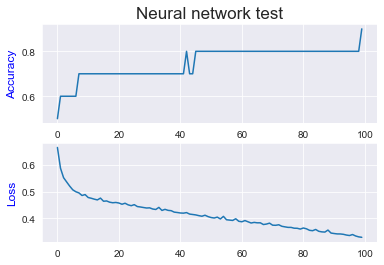

In [134]:
plt.figure()
plt.subplot(211) # для построения нескольких графиков в одном окне, 2 - количество графиков по вертикали, 1 - количество графиков по горизонтали, 1 - ячейка положения графика на сетке фигуры
plt.title('Neural network test', fontsize=17)
plt.plot(network_history.history['accuracy']) # обратный вызов истории обучения для параметра точности ['accuracy']
plt.xlabel('Epoch', fontsize=12, color='blue')
plt.ylabel('Accuracy', fontsize=12, color='blue')
plt.subplot(212)
plt.plot(network_history.history['loss'])
plt.ylabel('Loss', fontsize=12, color='blue')